# Pytorch Beginner Tutorial 
https://pytorch.org/tutorials/beginner/basics/intro.html

In [30]:
# Imports
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets, models
from torchvision.transforms import ToTensor

# Get cpu, gpu or mps device for training.
device = (
    "cuda"
    if torch.cuda.is_available()
    else "mps" # enable high performance training on GPU for MacOS
    if torch.backends.mps.is_available()
    else "cpu"
)
print(f"Using {device} device")

Using mps device


In [3]:
# Download training data from open datasets.
training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [01:48<00:00, 244467.99it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 116718.14it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:16<00:00, 268586.86it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 4388674.19it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [11]:
print(type(training_data))
print(training_data)
print(training_data.data.shape)

<class 'torchvision.datasets.mnist.FashionMNIST'>
Dataset FashionMNIST
    Number of datapoints: 60000
    Root location: data
    Split: Train
    StandardTransform
Transform: ToTensor()
torch.Size([60000, 28, 28])


In [6]:
# Load data into batches
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print(f"Shape of X [N, C, H, W]: {X.shape}")
    print(f"Shape of y: {y.shape} {y.dtype}")
    break

Shape of X [N, C, H, W]: torch.Size([64, 1, 28, 28])
Shape of y: torch.Size([64]) torch.int64


In [13]:
# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In [39]:
# Calculate the neurons, parameters, and connections in the model
import torch
import torch.nn as nn

def count_parameters_neurons_connections(model):
    total_params = 0
    total_neurons = 0
    total_connections = 0

    input_size = (1, 3, 224, 224)  # Example input size (batch size, channels, height, width)

    for layer_name, layer in model.named_children():
        if isinstance(layer, nn.Conv2d):
            # Convolutional Layer
            in_channels = layer.in_channels
            out_channels = layer.out_channels
            kernel_size = layer.kernel_size[0]
            stride = layer.stride[0]
            padding = layer.padding[0]

            # Calculate parameters for the convolutional layer
            layer_params = (in_channels * out_channels * kernel_size * kernel_size) + out_channels
            layer_params_without_bias = in_channels * out_channels * kernel_size * kernel_size

            # Calculate the number of neurons in the layer
            layer_neurons = out_channels * ((input_size[2] - kernel_size + 2 * padding) // stride + 1) * ((input_size[3] - kernel_size + 2 * padding) // stride + 1)

            # Calculate the total connections in the layer
            layer_connections = (in_channels * kernel_size * kernel_size + 1) * out_channels

        elif isinstance(layer, nn.Linear):
            # Fully Connected (Linear) Layer
            in_features = layer.in_features
            out_features = layer.out_features

            # Calculate parameters for the fully connected layer
            layer_params = in_features * out_features + out_features

            # Calculate the number of neurons in the layer
            layer_neurons = out_features

            # Calculate the total connections in the layer
            layer_connections = layer_params

        else:
            # Other types of layers are not considered
            layer_params = 0
            layer_neurons = 0
            layer_connections = 0

        total_params += layer_params
        total_neurons += layer_neurons
        total_connections += layer_connections

        print(f"Layer: {layer_name}, Parameters: {layer_params}, Neurons: {layer_neurons}, Connections: {layer_connections}")

    print(f"Total Parameters: {total_params}")
    print(f"Total Neurons: {total_neurons}")
    print(f"Total Connections: {total_connections}")

# Example usage:
# Define a sample neural network
class SampleModel(nn.Module):
    def __init__(self):
        super(SampleModel, self).__init__()
        self.conv1 = nn.Conv2d(3, 64, kernel_size=3, stride=1, padding=0)
        self.fc1 = nn.Linear(128, 128)
        self.fc2 = nn.Linear(128, 10)

    def forward(self, x):
        x = self.conv1(x)
        x = x.view(x.size(0), -1)
        x = self.fc1(x)
        x = self.fc2(x)
        return x

# model = SampleModel()
model = models.vgg16(weights=models.VGG16_Weights.DEFAULT)
model = model.features
count_parameters_neurons_connections(model)

# Layer 0: Parameters: (3 * 3 * 3 + 1) * 64 = 1792
# Layer 2: Parameters: (64 * 3 * 3 + 1) * 64 = 36928
# Layer 5: Parameters: (128 * 3 * 3 + 1) * 256 = 295168
# Layer 7: Parameters: (128 * 3 * 3 + 1) * 128 = 147584




Layer: 0, Parameters: 1792, Neurons: 3211264, Connections: 1792
Layer: 1, Parameters: 0, Neurons: 0, Connections: 0
Layer: 2, Parameters: 36928, Neurons: 3211264, Connections: 36928
Layer: 3, Parameters: 0, Neurons: 0, Connections: 0
Layer: 4, Parameters: 0, Neurons: 0, Connections: 0
Layer: 5, Parameters: 73856, Neurons: 6422528, Connections: 73856
Layer: 6, Parameters: 0, Neurons: 0, Connections: 0
Layer: 7, Parameters: 147584, Neurons: 6422528, Connections: 147584
Layer: 8, Parameters: 0, Neurons: 0, Connections: 0
Layer: 9, Parameters: 0, Neurons: 0, Connections: 0
Layer: 10, Parameters: 295168, Neurons: 12845056, Connections: 295168
Layer: 11, Parameters: 0, Neurons: 0, Connections: 0
Layer: 12, Parameters: 590080, Neurons: 12845056, Connections: 590080
Layer: 13, Parameters: 0, Neurons: 0, Connections: 0
Layer: 14, Parameters: 590080, Neurons: 12845056, Connections: 590080
Layer: 15, Parameters: 0, Neurons: 0, Connections: 0
Layer: 16, Parameters: 0, Neurons: 0, Connections: 0
La

In [41]:
print(model)

Sequential(
  (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (1): ReLU(inplace=True)
  (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (3): ReLU(inplace=True)
  (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (6): ReLU(inplace=True)
  (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (8): ReLU(inplace=True)
  (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (11): ReLU(inplace=True)
  (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (13): ReLU(inplace=True)
  (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (15): ReLU(inplace=True)
  (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (17): Conv2d(256, 512, kernel_si

[[0.3192451  0.51063436 0.3241715  ... 0.00672002 0.93268238 0.24406062]
 [0.13718537 0.00702383 0.0709007  ... 0.917904   0.28491715 0.02468555]
 [0.1152957  0.41869902 0.5378456  ... 0.83767671 0.1983611  0.34422869]
 ...
 [0.94051953 0.12877874 0.87899104 ... 0.0205612  0.18572723 0.82759106]
 [0.06910524 0.21838478 0.45299182 ... 0.95794417 0.70262087 0.57449342]
 [0.18141773 0.72602064 0.6200258  ... 0.48440488 0.05749265 0.90554826]]


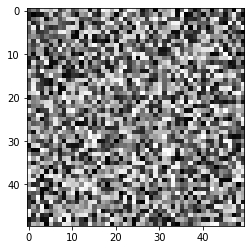

In [55]:
import numpy as np
M1 = np.random.rand(50, 50)
M2 = np.random.randn(3, 3)

# Graph
import matplotlib.pyplot as plt

# Graph M1
plt.imshow(M1, cmap='gray')
print(M1)

[[ 1.05007061 -1.04646761  0.16276236]
 [-1.23669967 -0.70377378  2.32714327]
 [ 0.36980136 -0.00960504 -0.54120641]]


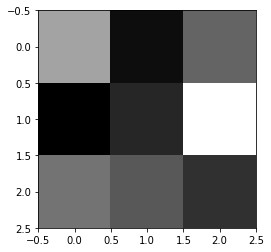

In [56]:
plt.imshow(M2, cmap='gray')
print(M2)